<a href="https://colab.research.google.com/github/Pablohv91/DataProjects/blob/main/Day77.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [ ]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [ ]:
# rows and columns
data.shape

(5391, 6)

In [ ]:
# NaN values
data.isna().any()

Rank                     False
Release_Date             False
Movie_Title              False
USD_Production_Budget    False
USD_Worldwide_Gross      False
USD_Domestic_Gross       False
dtype: bool

In [ ]:
# If duplicated
data.duplicated().any()

False

In [ ]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [ ]:
# Clean the data str from ',' and '$'
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']
 
for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[col] = data[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])

<ipython-input-9-f2978d599d3d>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].astype(str).str.replace(char, "")


In [ ]:
data.USD_Domestic_Gross.head(), data.USD_Worldwide_Gross.head(), data.USD_Production_Budget.head()

(0    10000000
 1           0
 2     8000000
 3     3000000
 4    11000000
 Name: USD_Domestic_Gross, dtype: int64, 0    11000000
 1           0
 2     8000000
 3     3000000
 4    22000000
 Name: USD_Worldwide_Gross, dtype: int64, 0    110000
 1    385907
 2    200000
 3    100000
 4    245000
 Name: USD_Production_Budget, dtype: int64)

In [ ]:
# Change str to float
data.USD_Domestic_Gross = data.USD_Domestic_Gross.astype(float)
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.astype(float)
data.USD_Production_Budget = data.USD_Production_Budget.astype(float)

In [ ]:
data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2416,2139,4/22/2005,King's Ransom,"25,000,000.00","4,049,527.00","4,008,527.00"
5179,2458,4/29/2016,Ratchet and Clank,"20,000,000.00","11,813,410.00","8,813,410.00"
1340,348,11/24/1999,End of Days,"100,000,000.00","212,026,975.00","66,889,043.00"
297,3804,5/22/1981,The Four Seasons,"6,500,000.00","42,488,161.00","42,488,161.00"
1012,2669,10/17/1997,I Know What You Did Last Summer,"17,000,000.00","125,250,091.00","72,250,091.00"


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [ ]:
data.Release_Date = pd.to_datetime(data['Release_Date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   float64       
 4   USD_Worldwide_Gross    5391 non-null   float64       
 5   USD_Domestic_Gross     5391 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [ ]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [ ]:
data[data.USD_Production_Budget == 1100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,"1,100.00","181,041.00","181,041.00"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [ ]:
gross_Domestic_0 = data[data.USD_Domestic_Gross == 0]
gross_Domestic_0

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00
6,4630,1927-12-08,Wings,"2,000,000.00",0.00,0.00
8,4240,1930-01-01,Hell's Angels,"4,000,000.00",0.00,0.00
17,4814,1936-10-20,"Charge of the Light Brigade, The","1,200,000.00",0.00,0.00
27,4789,1941-10-28,How Green Was My Valley,"1,250,000.00",0.00,0.00
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,"15,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5389,1119,2020-12-31,Hannibal the Conqueror,"50,000,000.00",0.00,0.00


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [ ]:
gross_Domestic_0.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla","80,000,000.00","4,547,660.00",0.00


### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [ ]:
data.query('(USD_Worldwide_Gross > 1) and (USD_Domestic_Gross == 0)')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,"3,380,000.00","3,220.00",0.00
1579,5087,2001-02-11,Everything Put Together,"500,000.00","7,890.00",0.00
1744,3695,2001-12-31,The Hole,"7,500,000.00","10,834,406.00",0.00
2155,4236,2003-12-31,Nothing,"4,000,000.00","63,180.00",0.00
2203,2513,2004-03-31,The Touch,"20,000,000.00","5,918,742.00",0.00
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,"36,000,000.00","1,480,089.00",0.00
5348,2225,2017-05-05,Chāi dàn zhuānjiā,"23,000,000.00","58,807,172.00",0.00
5360,4832,2017-07-03,Departure,"1,100,000.00","27,561.00",0.00
5372,1856,2017-08-25,Ballerina,"30,000,000.00","48,048,527.00",0.00


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [ ]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [ ]:
data_for_clean = data.query('Release_Date >= @scrape_date')
data_for_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00
5386,2950,2018-10-08,Meg,"15,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5389,1119,2020-12-31,Hannibal the Conqueror,"50,000,000.00",0.00,0.00
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The","20,000,000.00",0.00,0.00


In [ ]:
data_clean = pd.concat([data, data_for_clean]).drop_duplicates(keep=False)
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00"
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00
2,5230,1916-12-24,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00"
3,5299,1920-09-17,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00"
4,5222,1925-01-01,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00"
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,"40,000,000.00","166,893,990.00","92,029,184.00"
5380,70,2017-10-03,Kong: Skull Island,"185,000,000.00","561,137,727.00","168,052,812.00"
5381,94,2017-12-05,King Arthur: Legend of the Sword,"175,000,000.00","140,012,608.00","39,175,066.00"
5382,1254,2017-12-05,Snatched,"42,000,000.00","57,850,343.00","45,850,343.00"


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [ ]:
production_cost_exceeded = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
len(production_cost_exceeded) / len(data_clean) * 100

37.27711738484398

# Seaborn for Data Viz: Bubble Charts

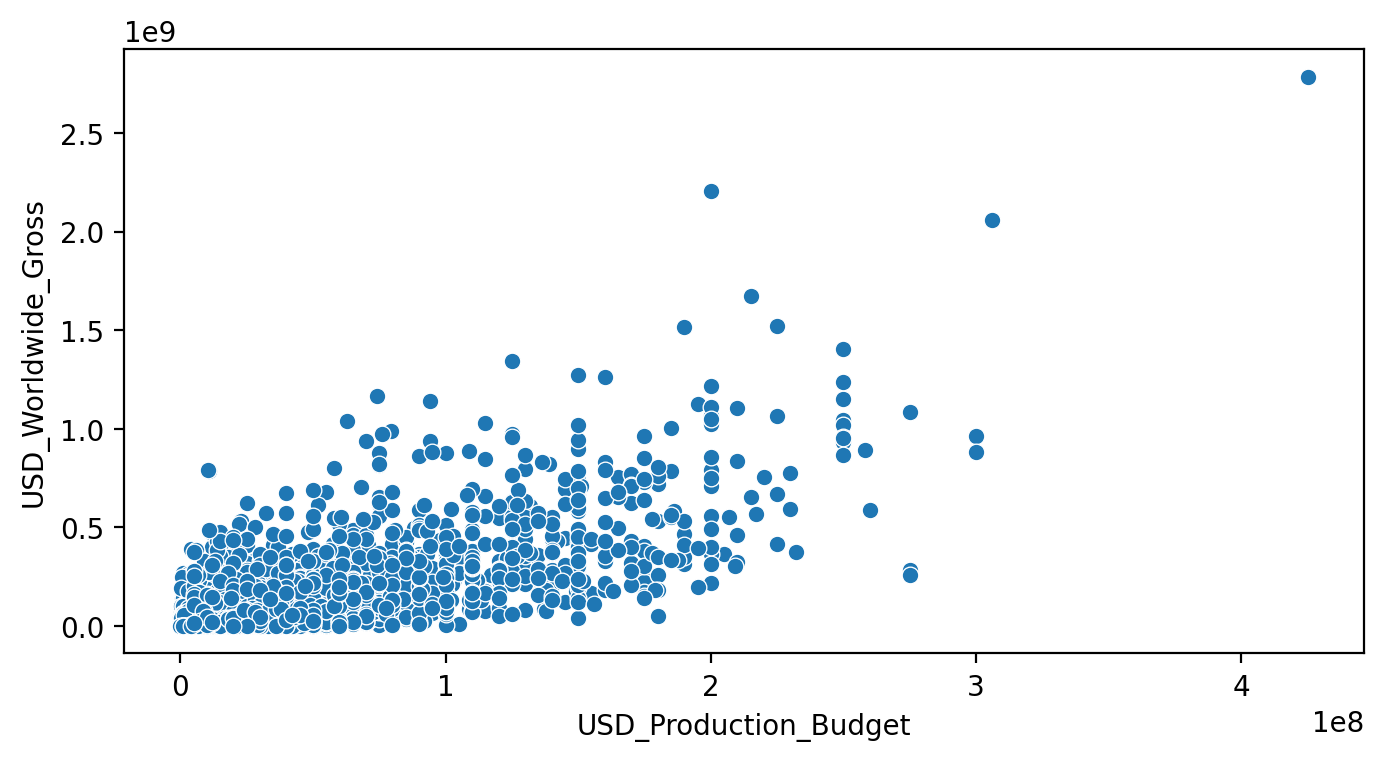

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

sns.scatterplot(data=data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross')

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



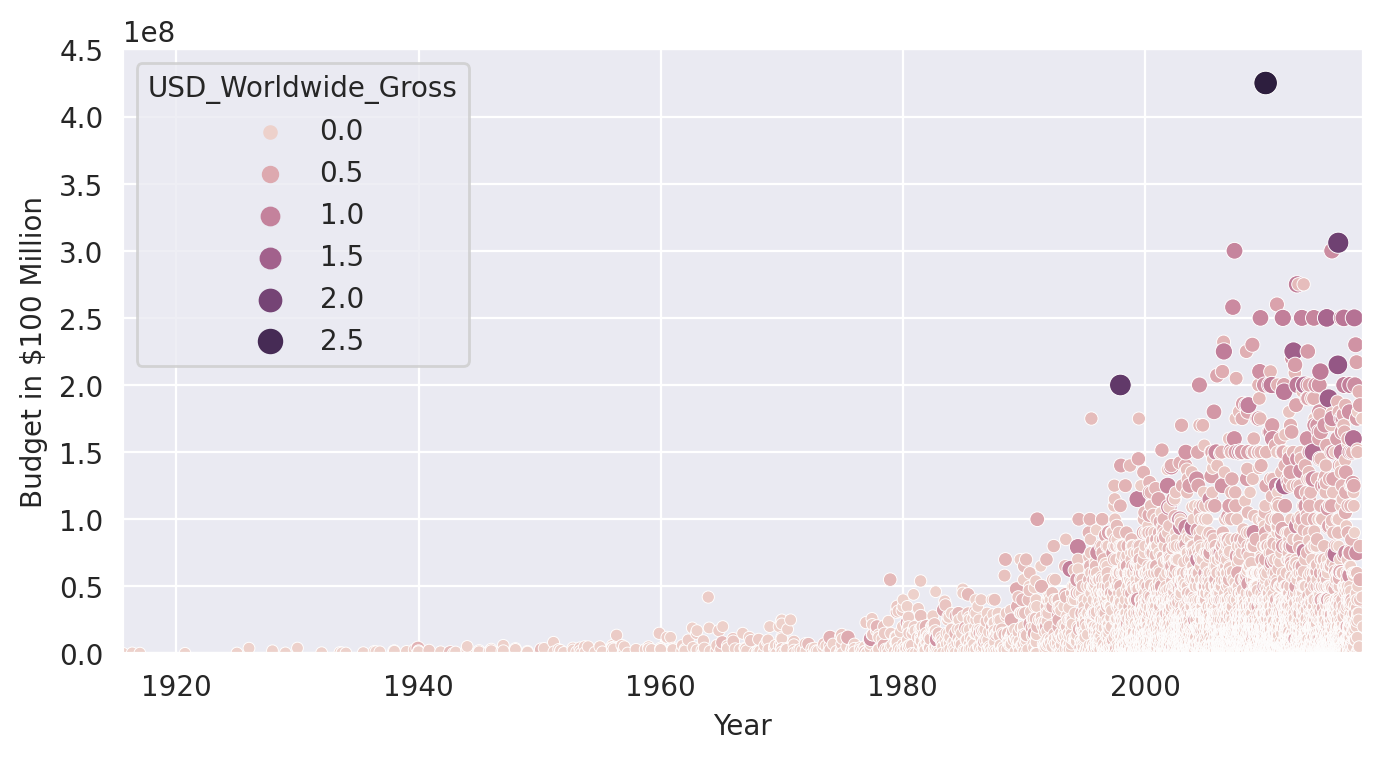

In [ ]:
plt.figure(figsize=(8,4), dpi=200) # size and definition

with sns.axes_style('darkgrid'): # Giving style to chart
  ax = sns.scatterplot(data=data_clean,
                  x='Release_Date',
                  y='USD_Production_Budget',
                  hue='USD_Worldwide_Gross', # Color
                  size='USD_Worldwide_Gross') 

  ax.set(ylim=(0, 450000000),
        xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()), # Set limit with a datetime
        ylabel='Budget in $100 Million',
        xlabel='Year')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [ ]:
date = pd.DatetimeIndex(data_clean.Release_Date)
decade = (date.year // 10) * 10
data_clean.insert(6, 'Decade', decade)

In [ ]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00",1910
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00",1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00",1920
4,5222,1925-01-01,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00",1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [ ]:
films_date = pd.Timestamp('1969-12-31')

In [ ]:
# Create two DataFrames
old_films_data = data_clean.query('Release_Date < @films_date')
new_films_data = data_clean.query('Release_Date > @films_date')

In [ ]:
# Most expensive film prior 1970
old_films_data.sort_values('USD_Production_Budget', ascending=False).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,"42,000,000.00","71,000,000.00","57,000,000.00",1960


In [ ]:
# Number of films prior 1970
old_films_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   153 non-null    int64         
 1   Release_Date           153 non-null    datetime64[ns]
 2   Movie_Title            153 non-null    object        
 3   USD_Production_Budget  153 non-null    float64       
 4   USD_Worldwide_Gross    153 non-null    float64       
 5   USD_Domestic_Gross     153 non-null    float64       
 6   Decade                 153 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 9.6+ KB


# Seaborn Regression Plots

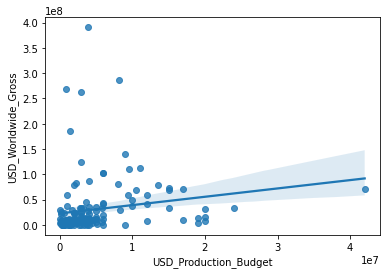

In [ ]:
sns.regplot(x="USD_Production_Budget",
            y="USD_Worldwide_Gross",
            data=old_films_data)

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

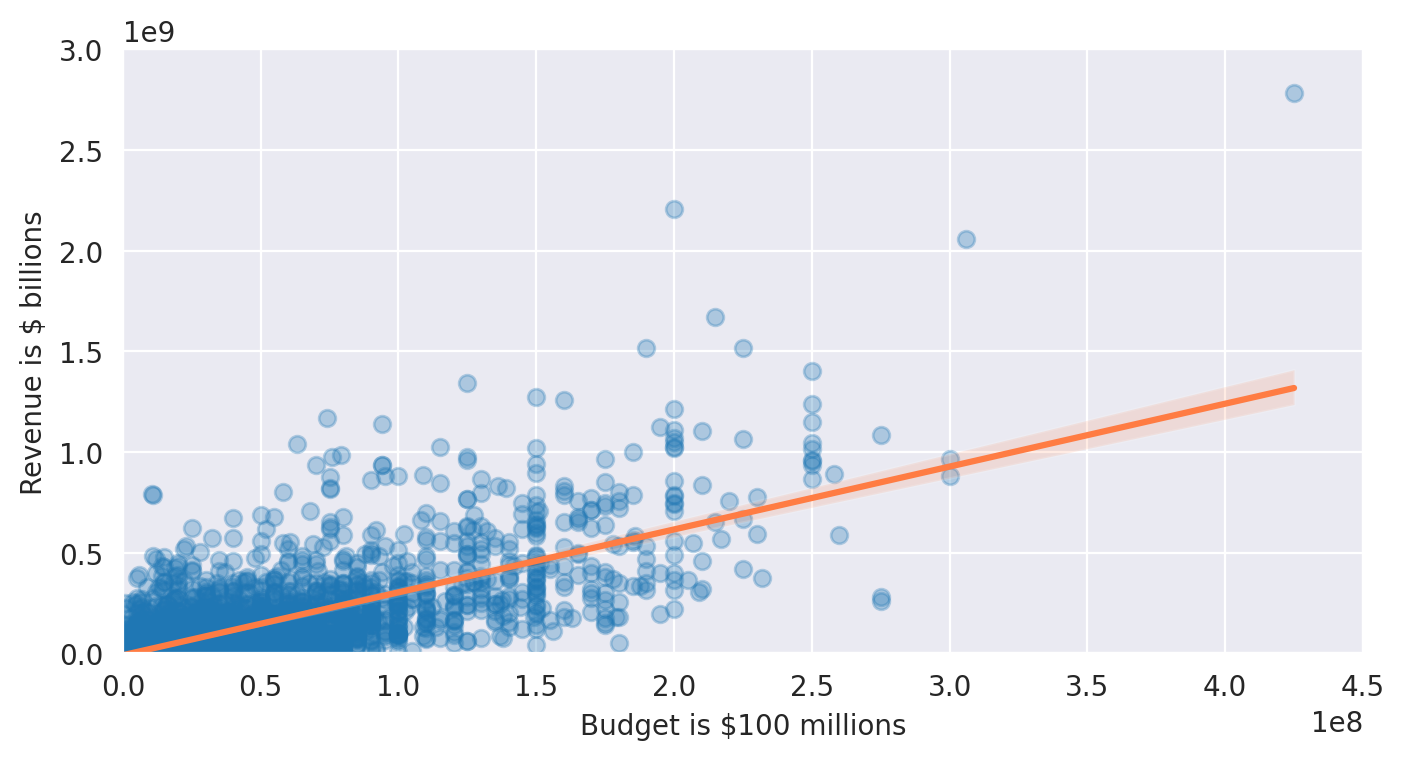

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax =sns.regplot(data=new_films_data, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.3},
            line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
          xlim=(0, 450000000),
          ylabel="Revenue is $ billions",
          xlabel="Budget is $100 millions")

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()

In [ ]:
# Explanatory Variable(s) or Feature(s)
X_new = pd.DataFrame(new_films_data, columns=['USD_Production_Budget'])

In [ ]:
# Responsive Variable or Target
y_new = pd.DataFrame(new_films_data, columns=['USD_Worldwide_Gross'])

In [ ]:
# Find the best-fit line
regression.fit(X_new, y_new)

LinearRegression()

In [ ]:
# Theta one
regression.intercept_

array([-8650768.00661027])

In [ ]:
# Theta zero
regression.coef_

array([[3.12259592]])

In [ ]:
# R-squared
regression.score(X_new, y_new)

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [ ]:
old_films_data = old_films_data.reset_index()

In [ ]:
X_old = pd.DataFrame(old_films_data, columns=['USD_Production_Budget'])

In [ ]:
y_old = pd.DataFrame(old_films_data, columns=['USD_Worldwide_Gross'])

In [ ]:
regression.fit(X_old, y_old)

LinearRegression()

In [ ]:
regression.intercept_

array([22821538.63508039])

In [ ]:
regression.coef_

array([[1.64771314]])

In [ ]:
regression.score(X_old, y_old)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [ ]:
22821538 + 1.64771314 * 350000000

599521137.0

In [ ]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0, 0] * budget
revenue_estimate = round(revenue_estimate, -6)

In [ ]:
print(f"The estimate revenue for a $350 film is around ${revenue_estimate:.10}")

The estimate revenue for a $350 film is around $600000000.0
